## Chemical exchange plot for 90 and 10% populations 

Adapted using the Javascript code from https://www.karamanoslab.com/nmr-animations

Also see: http://baldwinlab.chem.ox.ac.uk/resources/pramodhNotes.pdf

In [9]:
# Import useful things 

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

In [10]:
# Parameters (Nitrogen dimension)

Wa = 73200  # Chemical shift of state A in Hz 
R2a = 2.3   # Relaxation rate for state A (1/T2 in Hz)
R2b = 2.2   # Relaxation rate for state B (1/T2 in Hz)
Pb = 0.9   # Population fraction of state B
dW = 1800  # Chemical shift difference between states A and B (Hz)
line_broadening = 5   # Line broadening (Hz) 
num_points = 1024 
sweep_width = 12300 # Spectral width in Hz
Acq = num_points / sweep_width # Acquisition time in seconds

In [11]:
# Time and frequency arrays
time = np.linspace(0, Acq, num_points)
frequency = np.linspace(-sweep_width / 2, sweep_width / 2, num_points)

In [12]:
# Define the McConnell 2-state function
def McConnell_2_state_model(R2a, R2b, kab, kba, Wa, Wb):
    Wa = Wa * 2 * np.pi # Convert to radians 
    Wb = Wb * 2 * np.pi # Convert to radians 
    P = np.array([
        [R2a + kab, Wa, -kba, 0],
        [-Wa, R2a + kab, 0, -kba],
        [-kab, 0, R2b + kba, Wb],
        [0, -kab, -Wb, R2b + kba]
    ])
    return -P

In [13]:
# Define the simulation function
def kex_simulation(R2a, R2b, kex, Pb, dW):
    timedomain = []
    Pa = 1.0 - Pb
    kba = Pa * kex # Rate constant for transition from state B to A
    kab = Pb * kex # Rate constant for transition from state A to B
    Wb = Wa + dW # Calculate chemical shift of state B in Hz by taking state A + the difference 
    M0 = np.array([Pa, 0, Pb, 0]) # Initial magnetisation vector (based on population of two states)

    for tp in time:
        L = McConnell_2_state_model(R2a, R2b, kab, kba, Wa, Wb)
        M = scipy.linalg.expm(L * tp).dot(M0)
        timedomain.append(M[0] + 1j * M[1] + M[2] + 1j * M[3]) 
    
    timedomain = np.array(timedomain)
    LB = np.exp(-time * line_broadening)  # Apply line broadening (simulate effect of finite instrument resolution)
    fid = timedomain * LB # Free induction decay 
    ft = np.fft.fft(fid) # Fourier transform 
    ft_real = np.fft.fftshift(ft.real)
    return ft_real # Returns the real part 


In [14]:
# Define kex values for plotting
kex_values = np.logspace(np.log10(1e5), np.log10(1e-1), 7) 

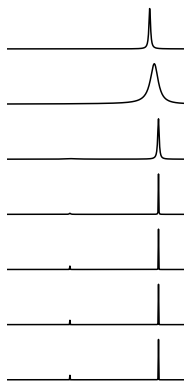

In [34]:
# Plotting
fig, axes = plt.subplots(
    len(kex_values), 
    1, 
    figsize=(70/25.4, 20/25.4 * len(kex_values)),  # Set size in inches (width, height)
    sharex=True
)

for i, kex in enumerate(kex_values):
    ax = axes[i]
    y = kex_simulation(R2a, R2b, kex, Pb, dW)
    ax.plot(frequency, y, label=f'kex = {kex:.1e} s⁻¹', color='black')

    # Remove everything except the line plot and the legend
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xlim(-1800, 1800)

    ax.get_xaxis().set_visible(False)  # Hide x-axis
    ax.get_yaxis().set_visible(False)  # Hide y-axis

plt.tight_layout()
plt.savefig('chem_ex_90.pdf', format='pdf', dpi=2000, transparent=True, bbox_inches='tight')


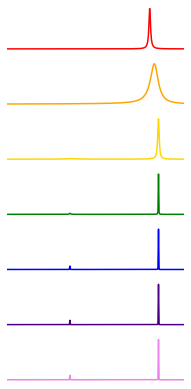

In [37]:
# Define rainbow colours
rainbow_colours = ['red', 'orange', 'gold', 'green', 'blue', 'indigo', 'violet']

# Plotting
fig, axes = plt.subplots(
    len(kex_values), 
    1, 
    figsize=(70/25.4, 20/25.4 * len(kex_values)),  # Set size in inches (width, height)
    sharex=True
)

for i, kex in enumerate(kex_values):
    ax = axes[i]
    y = kex_simulation(R2a, R2b, kex, Pb, dW)
    color = rainbow_colours[i % len(rainbow_colours)]  # Cycle through rainbow colors
    ax.plot(frequency, y, label=f'kex = {kex:.1e} s⁻¹', color=color)

    # Remove everything except the line plot and the legend
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xlim(-1800, 1800)

    ax.get_xaxis().set_visible(False)  # Hide x-axis
    ax.get_yaxis().set_visible(False)  # Hide y-axis

plt.tight_layout()
plt.savefig('chem_ex_90.pdf', format='pdf', dpi=2000, transparent=True, bbox_inches='tight')